In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from mxnet import image

img = image.imdecode(open('gluon-tutorials-zh/img/cat1.jpg', 'rb').read())
# plt.imshow(img.asnumpy())

In [5]:
from mxnet import nd
import sys
sys.path.append('gluon-tutorials-zh')
import utils

def apply(img, aug, n=3):
    # 转成float，一是因为aug需要float类型数据来方便做变化。
    # 二是这里会有一次copy操作，因为有些aug直接通过改写输入
    #（而不是新建输出）获取性能的提升
    X = [aug(img.astype('float32')) for _ in range(n*n)]
    # 有些aug不保证输入是合法值，所以做一次clip
    # 显示浮点图片时imshow要求输入在[0,1]之间
    Y = nd.stack(*X).clip(0,255)/255
    utils.show_images(Y, n, n, figsize=(8,8))
#utils.show_images??

aug = image.HorizontalFlipAug(.5)
#apply(img, aug)

In [9]:
# 随机裁剪一个块 200 x 200 的区域
aug = image.RandomCropAug([200,200])
#apply(img, aug)

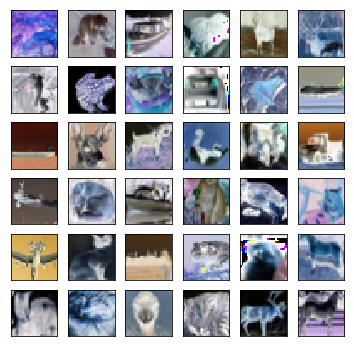

In [6]:
train_augs = [
    image.HorizontalFlipAug(.5),
    image.RandomCropAug((28,28))
]

test_augs = [
    image.CenterCropAug((28,28))
]

from mxnet import gluon
from mxnet import nd
import sys
sys.path.append('..')
import utils

def apply_aug_list(img, augs):
    for f in augs:
        img = f(img)
    return img

def get_transform(augs):
    def transform(data, label):
        # data: sample x height x width x channel
        # label: sample
        data = data.astype('float32')
        if augs is not None:
            # apply to each sample one-by-one and then stack
            data = nd.stack(*[
                apply_aug_list(d, augs) for d in data])
        data = nd.transpose(data, (0,3,1,2))
        return data, label.astype('float32')
    return transform

def get_data(batch_size, train_augs, test_augs=None):
    cifar10_train = gluon.data.vision.CIFAR10(
        train=True, transform=get_transform(train_augs))
    cifar10_test = gluon.data.vision.CIFAR10(
        train=False, transform=get_transform(test_augs))
    train_data = utils.DataLoader(
        cifar10_train, batch_size, shuffle=True)
    test_data = utils.DataLoader(
        cifar10_test, batch_size, shuffle=False)
    return (train_data, test_data)

train_data, _ = get_data(36, train_augs)
for imgs, _ in train_data:
    break
utils.show_images(imgs.transpose((0,2,3,1)), 6, 6)

In [7]:
from mxnet import init

def train(train_augs, test_augs, learning_rate=.1):
    batch_size = 128
    num_epochs = 10
    ctx = utils.try_all_gpus()
    loss = gluon.loss.SoftmaxCrossEntropyLoss()
    train_data, test_data = get_data(
        batch_size, train_augs, test_augs)
    net = utils.resnet18(10)
    net.initialize(ctx=ctx, init=init.Xavier())
    net.hybridize()
    trainer = gluon.Trainer(net.collect_params(),
                            'sgd', {'learning_rate': learning_rate})
    utils.train(
        train_data, test_data, net, loss, trainer, ctx, num_epochs)

In [8]:
train(train_augs, test_augs)

Start training on  [gpu(0)]
Epoch 0. Loss: 1.492, Train acc 0.47, Test acc 0.57, Time 31.8 sec
Epoch 1. Loss: 1.059, Train acc 0.63, Test acc 0.63, Time 30.2 sec
Epoch 2. Loss: 0.871, Train acc 0.69, Test acc 0.69, Time 29.6 sec
Epoch 3. Loss: 0.763, Train acc 0.73, Test acc 0.75, Time 29.1 sec
Epoch 4. Loss: 0.689, Train acc 0.76, Test acc 0.76, Time 29.1 sec
Epoch 5. Loss: 0.623, Train acc 0.78, Test acc 0.77, Time 29.0 sec
Epoch 6. Loss: 0.577, Train acc 0.80, Test acc 0.77, Time 29.3 sec
Epoch 7. Loss: 0.538, Train acc 0.81, Test acc 0.76, Time 30.7 sec
Epoch 8. Loss: 0.508, Train acc 0.82, Test acc 0.80, Time 30.6 sec
Epoch 9. Loss: 0.477, Train acc 0.83, Test acc 0.80, Time 30.7 sec


In [18]:
from mxnet.gluon import nn
import numpy as np

X = np.arange(10).reshape((2, 5))
print(X)
print(np.flipud(X))
X.mean(axis=1)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[5 6 7 8 9]
 [0 1 2 3 4]]


array([ 2.,  7.])

In [23]:
[1, 2, 3, 4, 5, 6, 7] // 3

TypeError: unsupported operand type(s) for //: 'list' and 'int'

In [9]:
train(test_augs, test_augs)

Start training on  [gpu(0)]
Epoch 0. Loss: 1.435, Train acc 0.49, Test acc 0.57, Time 28.4 sec
Epoch 1. Loss: 0.962, Train acc 0.66, Test acc 0.68, Time 28.6 sec
Epoch 2. Loss: 0.729, Train acc 0.75, Test acc 0.70, Time 27.4 sec
Epoch 3. Loss: 0.568, Train acc 0.80, Test acc 0.72, Time 28.5 sec
Epoch 4. Loss: 0.430, Train acc 0.85, Test acc 0.73, Time 28.5 sec
Epoch 5. Loss: 0.323, Train acc 0.89, Test acc 0.71, Time 27.9 sec
Epoch 6. Loss: 0.229, Train acc 0.92, Test acc 0.71, Time 27.2 sec
Epoch 7. Loss: 0.158, Train acc 0.95, Test acc 0.74, Time 28.6 sec
Epoch 8. Loss: 0.114, Train acc 0.96, Test acc 0.73, Time 28.4 sec
Epoch 9. Loss: 0.082, Train acc 0.97, Test acc 0.74, Time 28.5 sec
